In [1]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [105]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# reading the data
data = pd.read_csv('house_price_prediction.csv')

In [107]:
# printing first 5 rows of dataset
data.head()

,Bedrooms,Bathrooms,Square Footage,Age of House,Price (in $1000s)
0,3,2,1500,10,300
1,4,3,2000,5,400
2,2,1,800,20,150
3,3,2,1600,8,320
4,5,4,3000,3,600


In [139]:
# y for our training set 
y_train = data['Price (in $1000s)']

In [140]:
# X for our training set shape : (10, 4) that means 10 examples with 4 features each
X_train = data.drop(columns=['Price (in $1000s)'])

In [141]:
print(y_train.shape)
print(X_train.shape)

(10,)
(10, 4)


In [142]:
# converting into numpy array
X_train = np.array(X_train)

In [143]:
# let's print the first example
X_train[0]

array([   3,    2, 1500,   10])

In [144]:
## defining the parameters
W = np.random.rand(X_train.shape[1], 1)
b = 0
print(W.shape)


(4, 1)


In [145]:
## length of training data
n = len(X_train)
print(n)

10


In [146]:
def model(X, W, b):
    # X shape is (1, 4) and W shape is (4, 1)
    return np.dot(X, W) + b ## predicted price which would be a number

In [147]:
# function to calculate dJ/dW for one example
def dw(y_pred, y, W):
    return W*(y_pred - y)

In [148]:
# function to calculate dJ/db for one example
def db(y_pred, y):
    return (y_pred - y)*1

In [149]:
# learning rate 
lr = 0.001

W_new : [[0.03393253]
 [0.11693772]
 [0.18097102]
 [0.26330448]]
b_new : [-0.4562462]


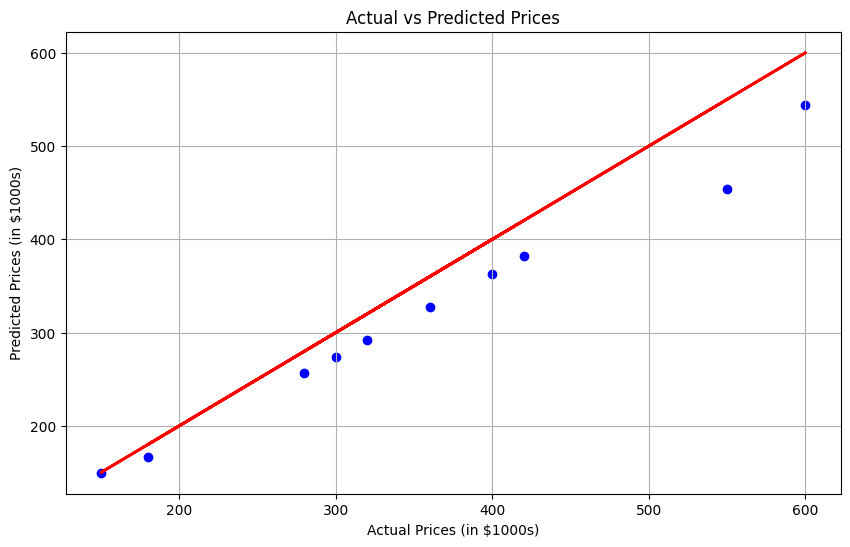

------------------------------------------------
W_new : [[0.03716952]
 [0.128093  ]
 [0.19823477]
 [0.28842243]]
b_new : [-0.36404426]


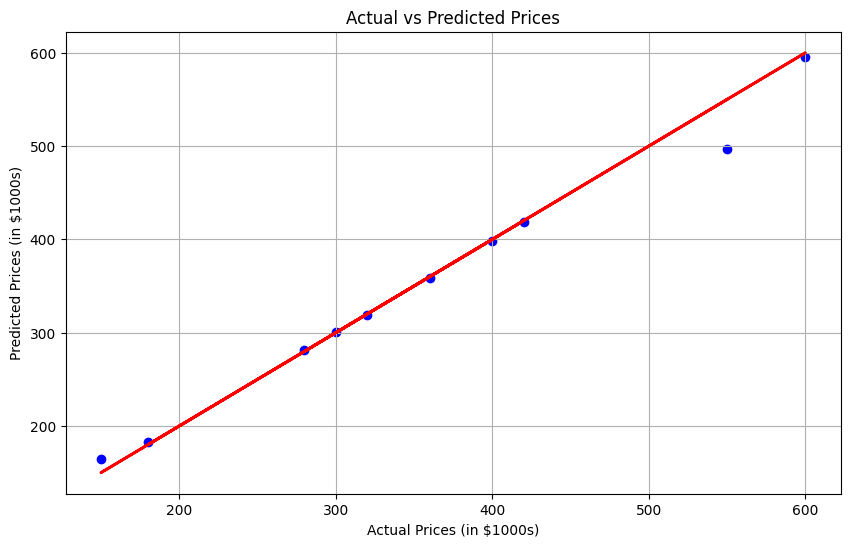

------------------------------------------------


In [150]:
##  gradient descent

for epoch in range(10):
    dW = np.zeros((4, 1))
    dB = 0
    for i in range(n):
        y_pred = model(X_train[i], W, b)
        ## loss function 1/2n * sum(y_pred - y)^2 
        dW += dw(y_pred, y_train[i], W)
        dB += db(y_pred, y_train[i])

    dW /= n
    dB /= n

    W = W - lr*dW
    b = b - lr*dB

    y_predicted = model(X_train, W, b)

    if((epoch+1)%5 == 0):
        print(f'W_new : {W}')
        print(f'b_new : {b}')
        plt.figure(figsize=(10, 6))
        plt.scatter(y_train, y_predicted, color='blue')
        plt.plot(y_train, y_train, color='red', linewidth=2)
        plt.xlabel('Actual Prices (in $1000s)')
        plt.ylabel('Predicted Prices (in $1000s)')
        plt.title('Actual vs Predicted Prices')
        plt.grid(True)
        plt.show()
        print("------------------------------------------------")


In [100]:
print(W)
print(b)

[[0.20190599]
 [1.94798249]
 [0.21371484]
 [1.83640882]]
[0.9288994]


In [ ]:
## our model equation is f(X) = w1*x1 + w2*x2 + w3*x3 + w4*x4 + b